# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe scikit-learn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results): 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

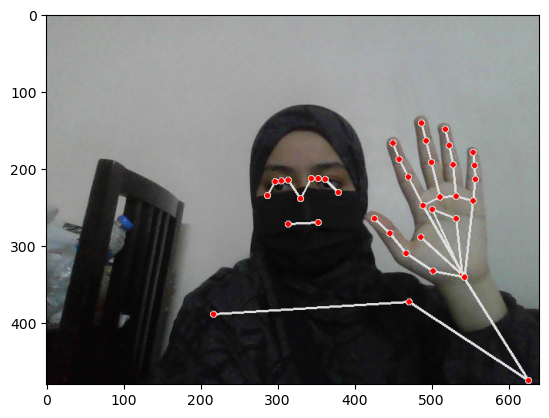

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 5.15706837e-01,  4.99857634e-01, -7.67578781e-01,  9.99998808e-01,
        5.38262486e-01,  4.45745349e-01, -7.04150558e-01,  9.99997318e-01,
        5.52985072e-01,  4.45743889e-01, -7.03890502e-01,  9.99997735e-01,
        5.67077279e-01,  4.47280824e-01, -7.03333974e-01,  9.99997437e-01,
        4.92052704e-01,  4.48885083e-01, -7.06352115e-01,  9.99995828e-01,
        4.77622569e-01,  4.50824887e-01, -7.05149591e-01,  9.99994695e-01,
        4.64366734e-01,  4.54077929e-01, -7.05399156e-01,  9.99992430e-01,
        5.92422366e-01,  4.82928872e-01, -3.28670025e-01,  9.99997854e-01,
        4.49017465e-01,  4.91116107e-01, -3.16926956e-01,  9.99995470e-01,
        5.52298903e-01,  5.64526379e-01, -6.31597638e-01,  9.99997079e-01,
        4.91658837e-01,  5.67178667e-01, -6.32473290e-01,  9.99994814e-01,
        7.37289488e-01,  7.78611481e-01, -1.41670525e-01,  9.99920726e-01,
        3.39879245e-01,  8.11041296e-01, -1.09974489e-01,  9.98417377e-01,
        9.79225278e-01,  

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 5.15706837e-01,  4.99857634e-01, -7.67578781e-01,  9.99998808e-01,
        5.38262486e-01,  4.45745349e-01, -7.04150558e-01,  9.99997318e-01,
        5.52985072e-01,  4.45743889e-01, -7.03890502e-01,  9.99997735e-01,
        5.67077279e-01,  4.47280824e-01, -7.03333974e-01,  9.99997437e-01,
        4.92052704e-01,  4.48885083e-01, -7.06352115e-01,  9.99995828e-01,
        4.77622569e-01,  4.50824887e-01, -7.05149591e-01,  9.99994695e-01,
        4.64366734e-01,  4.54077929e-01, -7.05399156e-01,  9.99992430e-01,
        5.92422366e-01,  4.82928872e-01, -3.28670025e-01,  9.99997854e-01,
        4.49017465e-01,  4.91116107e-01, -3.16926956e-01,  9.99995470e-01,
        5.52298903e-01,  5.64526379e-01, -6.31597638e-01,  9.99997079e-01,
        4.91658837e-01,  5.67178667e-01, -6.32473290e-01,  9.99994814e-01,
        7.37289488e-01,  7.78611481e-01, -1.41670525e-01,  9.99920726e-01,
        3.39879245e-01,  8.11041296e-01, -1.09974489e-01,  9.98417377e-01,
        9.79225278e-01,  

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', 'yes', 'no', 'help'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'yes': 3, 'no': 4, 'help': 5}

In [26]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
np.array(sequences).shape

(180, 30, 258)

In [28]:
np.array(labels).shape

(180,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(180, 30, 258)

In [31]:
y = to_categorical(labels).astype(int)

In [32]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
y_test.shape

(9, 6)

# 7. Build and Train LSTM Neural Network

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [79]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [80]:
def create_model(optimizer='adam', units=64, activation='relu'):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, activation=activation, input_shape=(30,258)))
    model.add(LSTM(units*2, return_sequences=True, activation=activation))
    model.add(LSTM(units, return_sequences=False, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(actions.shape[0], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [81]:
res = [.7, 0.2, 0.1]

In [82]:
actions[np.argmax(res)]

'hello'

In [83]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [84]:
# Define hyperparameters to tune
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'units': [64, 128],
    'activation': ['relu', 'tanh']
}

In [85]:
# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [86]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.243056 using {'activation': 'tanh', 'optimizer': 'adam', 'units': 64}


In [87]:
# Get the best model from grid search
best_model = grid_result.best_estimator_

In [88]:
# Compile the best model
best_model.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
# Train the best model
tb_callback = TensorBoard(log_dir=log_dir)
best_model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

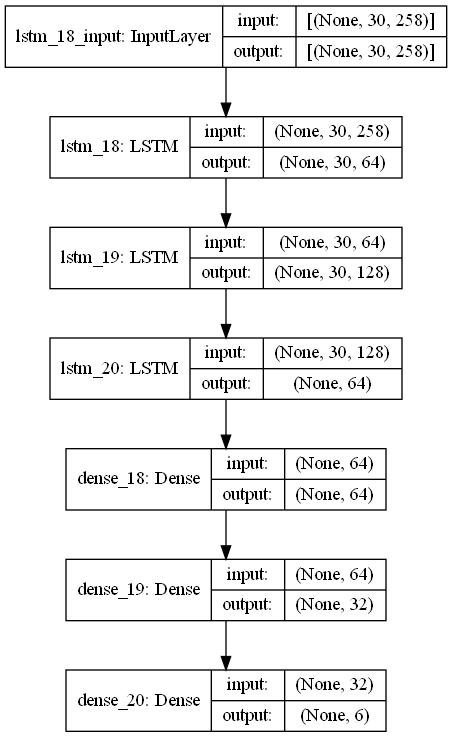

In [90]:
plot_model(best_model.model, to_file='model_architecture.png', show_shapes=True)

In [91]:
from sklearn.model_selection import train_test_split

# Split your original dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
history = best_model.fit(X_train, y_train, epochs=2000, validation_data=(X_val, y_val))

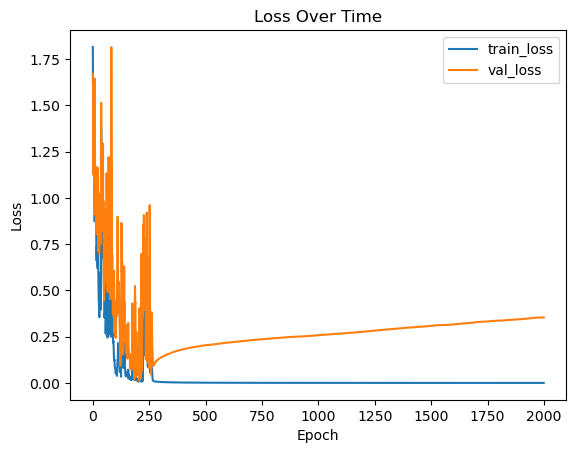

In [93]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()
plt.show()

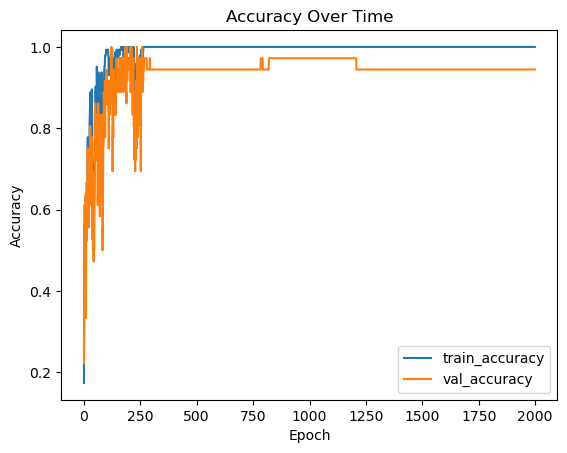

In [94]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.show()

In [95]:
best_model.model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 30, 64)            82688     
_________________________________________________________________
lstm_22 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_23 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 198       
Total params: 237,350
Trainable params: 237,350
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [96]:
res = best_model.model.predict(X_test)

In [97]:
actions[np.argmax(res[7])]

'hello'

In [98]:
actions[np.argmax(y_test[7])]

'hello'

# 9. Save Weights

In [99]:
best_model.model.save('action.h5')

In [100]:
best_model.model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [101]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [102]:
yhat = best_model.model.predict(X_test)

In [103]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [104]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[6, 0],
        [0, 3]],

       [[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]],

       [[6, 0],
        [0, 3]]], dtype=int64)

In [105]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [115]:
# from tensorflow.keras.models import load_model

In [116]:
# best_model = load_model('The path of model in your device')

In [117]:
# best_model.model = load_model('The path of model in your device')

In [118]:
# actions = ['hello', 'thanks', 'iloveyou', 'yes', 'no', 'help']

In [106]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245,16,117), (117,16,245), (16,245,117)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    # Check if res is a single probability value
    if not isinstance(res, np.ndarray):
        res = np.array([res])  # Convert single value to array
    
    for num, prob in enumerate(res):
        # Check if num is within the range of colors
        if num < len(colors):
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
            cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        else:
            print("Warning: Not enough colors provided for visualization.")
            break

    return output_frame

In [107]:
print(type(sequence))

<class 'int'>


In [108]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)

        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = best_model.model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [109]:
cap.release()
cv2.destroyAllWindows()

In [110]:
res[np.argmax(res)] > threshold

True

In [111]:
(None,30,258)

(None, 30, 258)

In [112]:
best_model.model.predict(np.expand_dims(X_test[0], axis=0))

array([[9.9998045e-01, 5.3708168e-06, 3.3681877e-06, 2.9635260e-07,
        9.6352469e-06, 9.2131461e-07]], dtype=float32)

In [113]:
import pkg_resources

# List all installed packages and their versions
installed_packages = pkg_resources.working_set
for package in installed_packages:
    print(package)

opencv-python 4.9.0.80
Babel 2.11.0
Bottleneck 1.3.5
Brotli 1.0.9
Jinja2 3.1.3
Keras-Applications 1.0.8
Keras-Preprocessing 1.1.2
Markdown 3.4.1
MarkupSafe 2.1.3
PyJWT 2.4.0
PyQt5 5.15.10
PyQt5-sip 12.13.0
PySocks 1.7.1
PyWavelets 1.4.1
PyYAML 6.0.1
Pygments 2.15.1
Send2Trash 1.8.2
absl-py 0.15.0
aiohttp 3.9.3
aiosignal 1.2.0
anyio 4.2.0
argon2-cffi 21.3.0
argon2-cffi-bindings 21.2.0
astor 0.8.1
asttokens 2.0.5
astunparse 1.6.3
async-lru 2.0.4
async-timeout 4.0.3
attrs 23.1.0
backcall 0.2.0
beautifulsoup4 4.12.2
bleach 4.1.0
blinker 1.6.2
bokeh 3.1.1
cachetools 4.2.2
category-encoders 2.6.3
certifi 2024.2.2
cffi 1.16.0
charset-normalizer 3.3.2
click 8.1.7
cloudpickle 2.2.1
colorama 0.4.6
comm 0.2.1
contourpy 1.0.5
cryptography 42.0.5
cycler 0.11.0
cytoolz 0.12.2
daal4py 2023.0.2
dask 2023.4.1
debugpy 1.6.7
decorator 5.1.1
defusedxml 0.7.1
exceptiongroup 1.2.0
executing 0.8.3
fastjsonschema 2.16.2
flatbuffers 1.12
fonttools 4.25.0
frozenlist 1.4.0
fsspec 2023.10.0
gast 0.3.3
google-auth

In [114]:
pip list

Package                      Version
---------------------------- -------------------
absl-py                      0.15.0
aiohttp                      3.9.3
aiosignal                    1.2.0
anyio                        4.2.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
astor                        0.8.1
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       4.1.0
blinker                      1.6.2
bokeh                        3.1.1
Bottleneck                   1.3.5
Brotli                       1.0.9
cachetools                   4.2.2
category-encoders            2.6.3
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           3.3.2
click                        